In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

In [31]:
df = pd.read_csv("Cleaned_Data.csv")

In [33]:
X = df["Clean_text"]

In [35]:
y = df["target"]
y.value_counts()

target
0    4314
1    3265
Name: count, dtype: int64

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [39]:
vectorizer = CountVectorizer(max_features=2000)
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

In [41]:
param_grid = {
    'kernel' : ['linear','poly','rbf','sigmoid'],
    'C' : [0.1,1,10],
    'gamma' : ['scale','auto']
}

In [72]:
model = GridSearchCV(SVC(),param_grid,cv=5,scoring='f1',n_jobs = -1)

In [74]:
model.fit(X_train_counts,y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1')

In [75]:
model.best_params_

{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

In [76]:
y_pred = model.predict(X_test_counts)

In [77]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8139841688654353


In [78]:
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       427
           1       0.85      0.69      0.77       331

    accuracy                           0.81       758
   macro avg       0.82      0.80      0.81       758
weighted avg       0.82      0.81      0.81       758



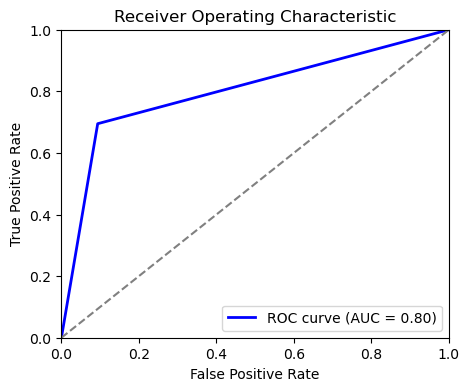

In [79]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(5,4))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()